**Simulating the decay in amplitude of an action potential at different distances from Soma**

Figure 1C
https://www.nature.com/articles/nn0101_63

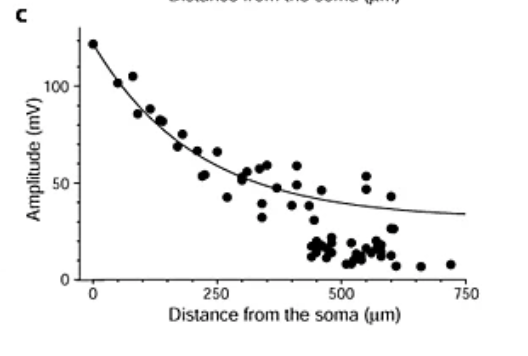

In [3]:
from IPython.display import Image
Image("Images/hw_2_fig1c.png")

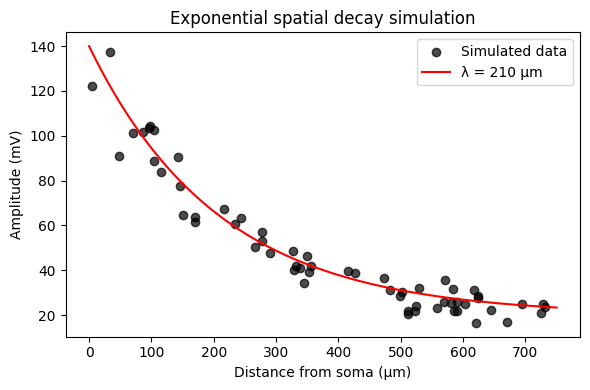

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_um = 210.0    # decay constant (µm)
A0 = 120.0           # amplitude at soma (mV)
B = 20.0             # offset (mV)
n_points = 60        # number of data points

# Random generator
rng = np.random.default_rng(42)

# Distances (µm)
x = np.sort(rng.uniform(0, 750, size=n_points))

# True underlying exponential function
y_true = A0 * np.exp(-x / lambda_um) + B

# Add noise (heteroscedastic: more at larger amplitudes)
noise_sd = 0.1 * y_true + 3.0
y_obs = y_true + rng.normal(0, noise_sd)

# Clip to nonnegative
y_obs = np.clip(y_obs, 0, None)

# Plot
plt.figure(figsize=(6,4))
plt.scatter(x, y_obs, color="black", label="Simulated data", alpha=0.7)

x_curve = np.linspace(0, 750, 400)
y_curve = A0 * np.exp(-x_curve / lambda_um) + B
plt.plot(x_curve, y_curve, color="red", label=f"λ = {lambda_um:.0f} µm")

plt.xlabel("Distance from soma (µm)")
plt.ylabel("Amplitude (mV)")
plt.title("Exponential spatial decay simulation")
plt.legend()
plt.tight_layout()
plt.show()